In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
data = pd.read_excel('TWI.xlsx')
data

,Income2,Material Charges2,Labour Charges2,Transport Charges2,Total Expense2,Branch_AMD,Branch_BLR,Branch_BOM,Branch_COK,Branch_DEL,...,Branch_MAA,Branch_OSS,Branch_PNQ,Branch_VAD,Job Type_Destination Agent,Job Type_Inbound,Job Type_Origin Agent,Job Type_Outbound,Job Type_Packing,Job Type_Storage
0,17.302127,-8.037178,27.138341,32.272682,36.627209,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,16.681325,-8.037178,24.447655,29.178268,33.064544,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16.890984,-8.037178,23.259776,27.811470,31.494822,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12.471293,-8.037178,10.092504,12.625790,14.253845,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,17.338906,-8.037178,21.974124,26.331672,29.798170,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,16.602373,-8.037178,19.841629,23.875940,26.989455,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2232,10.920965,-8.037178,-3.925972,-3.941430,-3.865500,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2233,13.235719,-8.037178,16.881066,20.463904,23.102414,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2234,19.911568,-8.037178,30.537523,36.179058,41.210651,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [3]:
data.columns

Index(['Income2', 'Material Charges2', 'Labour Charges2', 'Transport Charges2',
       'Total Expense2', 'Branch_AMD', 'Branch_BLR', 'Branch_BOM',
       'Branch_COK', 'Branch_DEL', 'Branch_GMS', 'Branch_HYD', 'Branch_KOL',
       'Branch_MAA', 'Branch_OSS', 'Branch_PNQ', 'Branch_VAD',
       'Job Type_Destination Agent', 'Job Type_Inbound',
       'Job Type_Origin Agent', 'Job Type_Outbound', 'Job Type_Packing',
       'Job Type_Storage'],
      dtype='object')

## AdaBoost Algorithm

### Without taking into consideration any encoded categorical features 

In [4]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data[['Material Charges2','Labour Charges2', 'Transport Charges2', 'Total Expense2']], data['Income2'],test_size=0.3,random_state=42)

In [6]:
ada_reg = AdaBoostRegressor()

In [7]:
ada_reg.fit(x_train,y_train)

AdaBoostRegressor()

In [8]:
y_pred = ada_reg.predict(x_test)

In [9]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 2.7236135918002273
Mean Absolute Error: 1.1836690882386325
Root Mean Squared Error: 1.6503374175604901


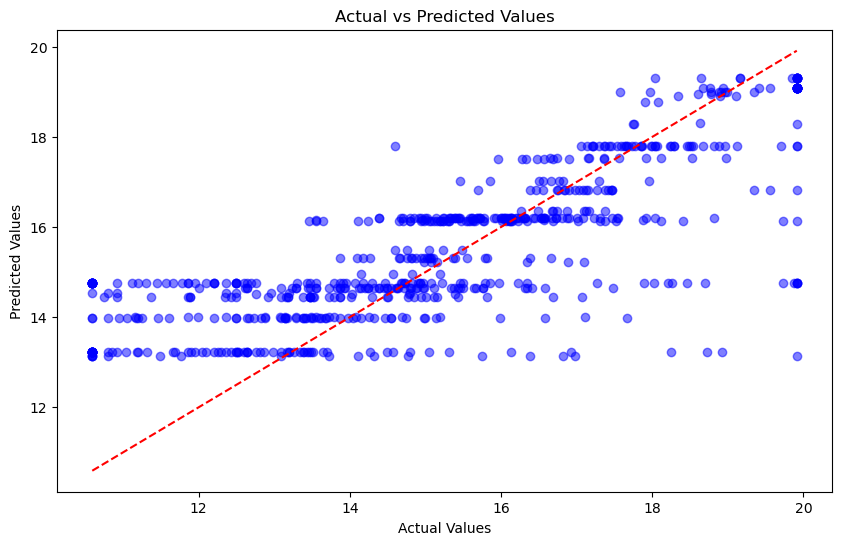

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Taking into consideration the encded categorical features 

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data[['Material Charges2','Labour Charges2', 'Transport Charges2', 'Total Expense2','Branch_AMD', 'Branch_BLR', 'Branch_BOM',
       'Branch_COK', 'Branch_DEL', 'Branch_GMS', 'Branch_HYD', 'Branch_KOL',
       'Branch_MAA', 'Branch_OSS', 'Branch_PNQ', 'Branch_VAD',
       'Job Type_Destination Agent', 'Job Type_Inbound',
       'Job Type_Origin Agent', 'Job Type_Outbound', 'Job Type_Packing',
       'Job Type_Storage']], data['Income2'],test_size=0.3,random_state=44)

In [12]:
ada_reg1 = AdaBoostRegressor()

In [13]:
ada_reg1.fit(x_train1,y_train1)

AdaBoostRegressor()

In [14]:
y_pred1 = ada_reg1.predict(x_test1)

In [15]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test1,y_pred1)
MAE = mean_absolute_error(y_test1,y_pred1)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 2.4102247494023437
Mean Absolute Error: 1.1406914754417667
Root Mean Squared Error: 1.552489854846834


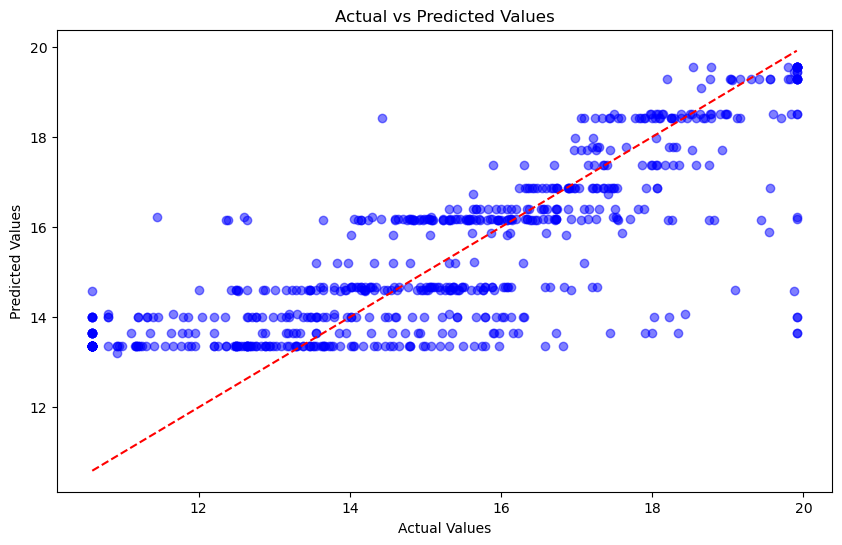

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred1, color='blue', alpha=0.5)
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## XGBoost Algorithm

### Without taking into consideration any encoded categorical features 

In [17]:
import xgboost as xgb

In [18]:
xgb_reg = xgb.XGBRegressor()

In [19]:
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred = xgb_reg.predict(x_test)

In [21]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 2.896647565307378
Mean Absolute Error: 1.2084192737651585
Root Mean Squared Error: 1.7019540432418785


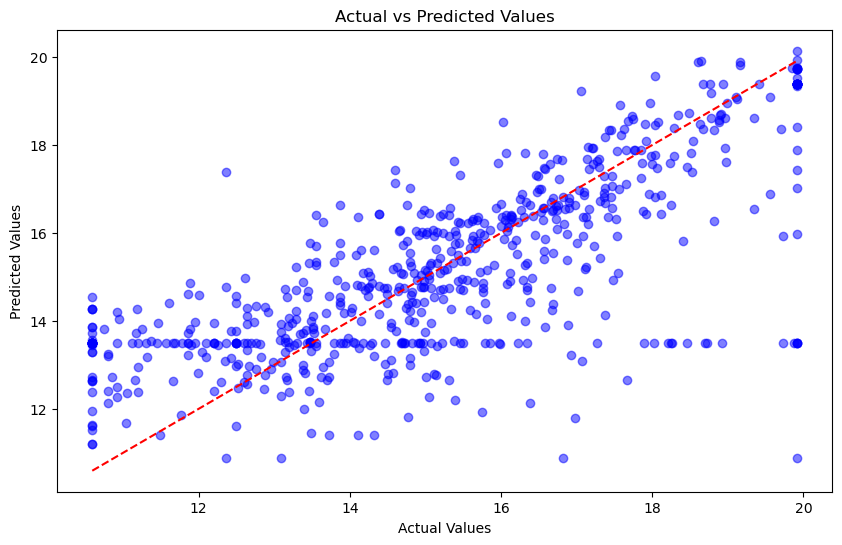

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Taking into consideration the encoded categorical feature

In [23]:
xgb_reg1 = xgb.XGBRegressor()

In [24]:
xgb_reg1.fit(x_train1,y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred1 = xgb_reg1.predict(x_test1)

In [26]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test1,y_pred1)
MAE = mean_absolute_error(y_test1,y_pred1)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 2.087752740908692
Mean Absolute Error: 1.0447767552874911
Root Mean Squared Error: 1.4449057896308297


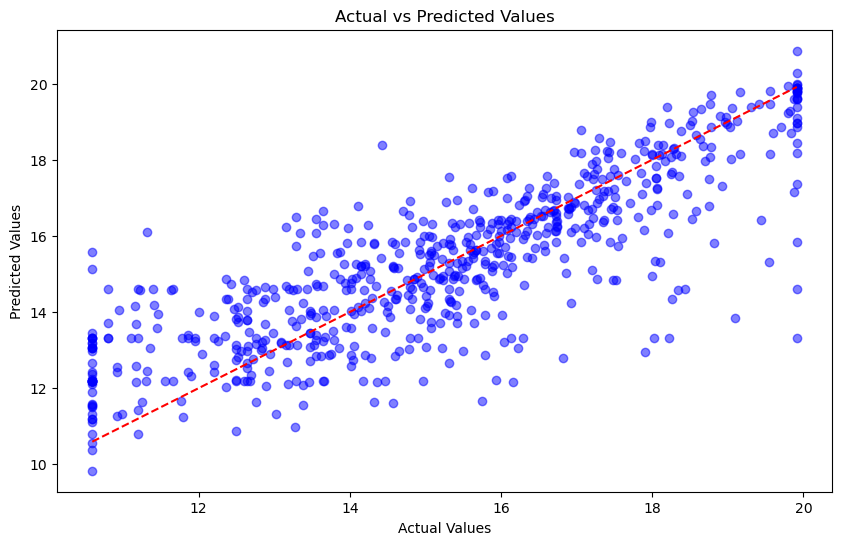

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred1, color='blue', alpha=0.5)
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Gradient Boosting Algorithm 


### Without Taking into consideration any encoded categorical features

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
gb_reg = GradientBoostingRegressor()

In [33]:
gb_reg.fit(x_train,y_train)

GradientBoostingRegressor()

In [34]:
y_pred = gb_reg.predict(x_test)

In [35]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 2.607689248810624
Mean Absolute Error: 1.1121019090605144
Root Mean Squared Error: 1.6148341242402031


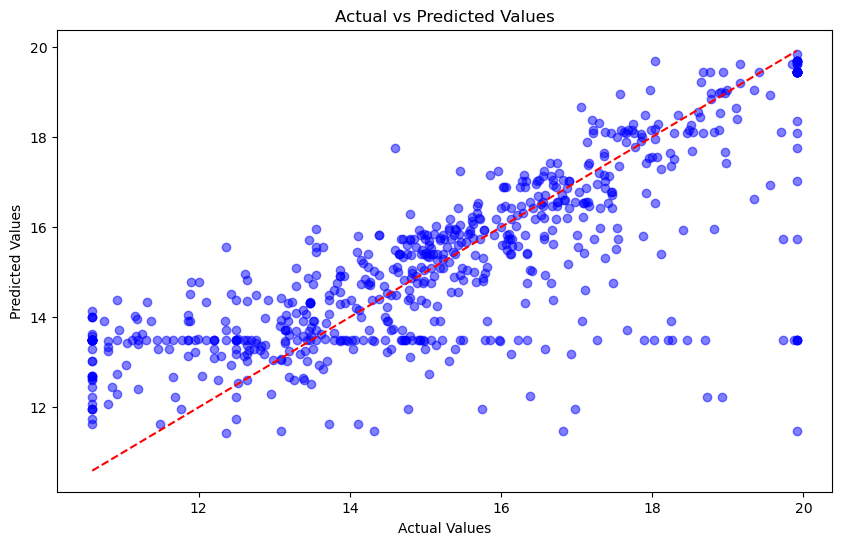

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Taking into consideration the encoded categorical features 

In [38]:
gb_reg1 = GradientBoostingRegressor()

In [40]:
gb_reg1.fit(x_train1,y_train1)

GradientBoostingRegressor()

In [41]:
y_pred1 = gb_reg1.predict(x_test1)

In [42]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test1,y_pred1)
MAE = mean_absolute_error(y_test1,y_pred1)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 1.9038282368313484
Mean Absolute Error: 0.9830878677786594
Root Mean Squared Error: 1.3797928238802188


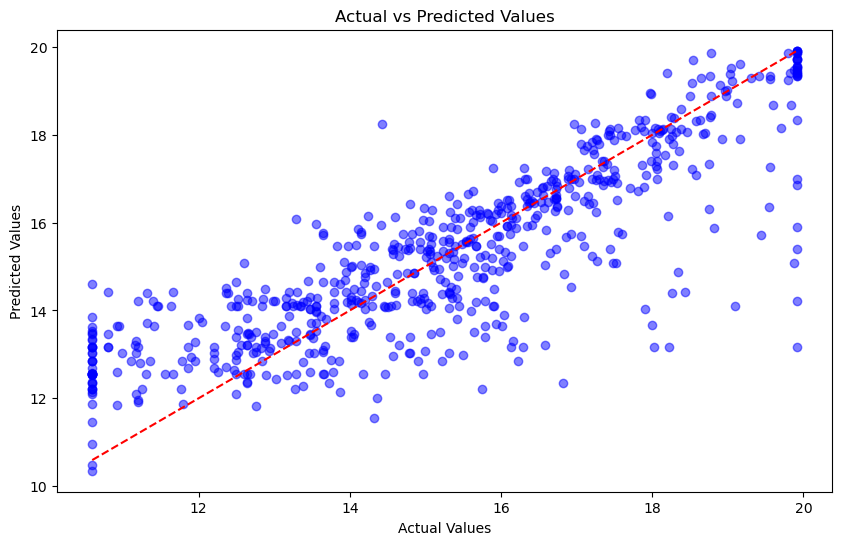

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred1, color='blue', alpha=0.5)
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## More Scaled Data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
data = pd.read_excel('TWI.xlsx')
data

,Income2,Material Charges2,Labour Charges2,Transport Charges2,Total Expense2,Branch_AMD,Branch_BLR,Branch_BOM,Branch_COK,Branch_DEL,...,Branch_MAA,Branch_OSS,Branch_PNQ,Branch_VAD,Job Type_Destination Agent,Job Type_Inbound,Job Type_Origin Agent,Job Type_Outbound,Job Type_Packing,Job Type_Storage
0,17.302127,-8.037178,27.138341,32.272682,36.627209,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,16.681325,-8.037178,24.447655,29.178268,33.064544,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16.890984,-8.037178,23.259776,27.811470,31.494822,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12.471293,-8.037178,10.092504,12.625790,14.253845,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,17.338906,-8.037178,21.974124,26.331672,29.798170,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,16.602373,-8.037178,19.841629,23.875940,26.989455,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2232,10.920965,-8.037178,-3.925972,-3.941430,-3.865500,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2233,13.235719,-8.037178,16.881066,20.463904,23.102414,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2234,19.911568,-8.037178,30.537523,36.179058,41.210651,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [3]:
data.columns

Index(['Income2', 'Material Charges2', 'Labour Charges2', 'Transport Charges2',
       'Total Expense2', 'Branch_AMD', 'Branch_BLR', 'Branch_BOM',
       'Branch_COK', 'Branch_DEL', 'Branch_GMS', 'Branch_HYD', 'Branch_KOL',
       'Branch_MAA', 'Branch_OSS', 'Branch_PNQ', 'Branch_VAD',
       'Job Type_Destination Agent', 'Job Type_Inbound',
       'Job Type_Origin Agent', 'Job Type_Outbound', 'Job Type_Packing',
       'Job Type_Storage'],
      dtype='object')

In [4]:
from sklearn.preprocessing import RobustScaler

In [5]:
scaler = RobustScaler()

In [6]:
df = pd.DataFrame(scaler.fit_transform(data[['Income2', 'Material Charges2', 'Labour Charges2', 'Transport Charges2',
       'Total Expense2']]),columns=scaler.get_feature_names_out())

In [7]:
df

,Income2,Material Charges2,Labour Charges2,Transport Charges2,Total Expense2
0,0.585286,0.0,0.845799,0.844325,0.795464
1,0.406036,0.0,0.622057,0.621205,0.560358
2,0.466573,0.0,0.523280,0.522653,0.456770
3,-0.809564,0.0,-0.571637,-0.572298,-0.680988
4,0.595905,0.0,0.416372,0.415953,0.344805
...,...,...,...,...,...
2231,0.383240,0.0,0.239045,0.238885,0.159454
2232,-1.257204,0.0,-1.737336,-1.766864,-1.876711
2233,-0.588844,0.0,-0.007138,-0.007137,-0.097058
2234,1.338733,0.0,1.128456,1.125991,1.097932


In [14]:
data.drop('Income2',axis=1,inplace=True)
data.drop('Material Charges2',axis=1,inplace=True)
data.drop('Labour Charges2',axis=1,inplace=True)
data.drop('Transport Charges2',axis=1,inplace=True)
data.drop('Total Expense2',axis=1,inplace=True)

In [15]:
data

,Branch_AMD,Branch_BLR,Branch_BOM,Branch_COK,Branch_DEL,Branch_GMS,Branch_HYD,Branch_KOL,Branch_MAA,Branch_OSS,Branch_PNQ,Branch_VAD,Job Type_Destination Agent,Job Type_Inbound,Job Type_Origin Agent,Job Type_Outbound,Job Type_Packing,Job Type_Storage
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2232,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2233,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2234,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [16]:
new_data = pd.concat([df,data],axis=1).reset_index(drop=True)

In [17]:
new_data

,Income2,Material Charges2,Labour Charges2,Transport Charges2,Total Expense2,Branch_AMD,Branch_BLR,Branch_BOM,Branch_COK,Branch_DEL,...,Branch_MAA,Branch_OSS,Branch_PNQ,Branch_VAD,Job Type_Destination Agent,Job Type_Inbound,Job Type_Origin Agent,Job Type_Outbound,Job Type_Packing,Job Type_Storage
0,0.585286,0.0,0.845799,0.844325,0.795464,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.406036,0.0,0.622057,0.621205,0.560358,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.466573,0.0,0.523280,0.522653,0.456770,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.809564,0.0,-0.571637,-0.572298,-0.680988,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.595905,0.0,0.416372,0.415953,0.344805,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.383240,0.0,0.239045,0.238885,0.159454,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2232,-1.257204,0.0,-1.737336,-1.766864,-1.876711,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2233,-0.588844,0.0,-0.007138,-0.007137,-0.097058,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2234,1.338733,0.0,1.128456,1.125991,1.097932,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### Gradient Boosting Algorithm

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
gb_reg = GradientBoostingRegressor()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
x_train, x_test, y_train, y_test = train_test_split(new_data[['Material Charges2','Labour Charges2', 'Transport Charges2', 'Total Expense2']], new_data['Income2'],test_size=0.3,random_state=42)

In [23]:
gb_reg.fit(x_train,y_train)

GradientBoostingRegressor()

In [24]:
y_pred = gb_reg.predict(x_test)

In [25]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 0.21654931703443642
Mean Absolute Error: 0.3201387577575113
Root Mean Squared Error: 0.46534859732724715


In [27]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(new_data[['Material Charges2','Labour Charges2', 'Transport Charges2', 'Total Expense2','Branch_AMD', 'Branch_BLR', 'Branch_BOM',
       'Branch_COK', 'Branch_DEL', 'Branch_GMS', 'Branch_HYD', 'Branch_KOL',
       'Branch_MAA', 'Branch_OSS', 'Branch_PNQ', 'Branch_VAD',
       'Job Type_Destination Agent', 'Job Type_Inbound',
       'Job Type_Origin Agent', 'Job Type_Outbound', 'Job Type_Packing',
       'Job Type_Storage']], new_data['Income2'],test_size=0.3,random_state=44)

In [28]:
gb_reg1 = GradientBoostingRegressor()

In [29]:
gb_reg1.fit(x_train1,y_train1)

GradientBoostingRegressor()

In [30]:
y_pred1 = gb_reg1.predict(x_test1)

In [31]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test1,y_pred1)
MAE = mean_absolute_error(y_test1,y_pred1)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 0.1585765038995344
Mean Absolute Error: 0.28389452786679137
Root Mean Squared Error: 0.3982166544728314


### XGBoost Algorithm

In [32]:
import xgboost as xgb

In [33]:
xgb_reg = xgb.XGBRegressor()

In [34]:
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = xgb_reg.predict(x_test)

In [36]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 0.24149388199622573
Mean Absolute Error: 0.34891742095736766
Root Mean Squared Error: 0.4914202702333571


In [37]:
xgb_reg1 = xgb.XGBRegressor()

In [38]:
xgb_reg1.fit(x_train1,y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred1 = xgb_reg1.predict(x_test1)

In [40]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test1,y_pred1)
MAE = mean_absolute_error(y_test1,y_pred1)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 0.17405632021367698
Mean Absolute Error: 0.3016677488654878
Root Mean Squared Error: 0.41720057551935014


### AdaBoost Algorithm

In [41]:
from sklearn.ensemble import AdaBoostRegressor

In [42]:
ada_reg = AdaBoostRegressor()

In [43]:
ada_reg.fit(x_train,y_train)

AdaBoostRegressor()

In [44]:
y_pred = ada_reg.predict(x_test)

In [45]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 0.21412294710541005
Mean Absolute Error: 0.32967573306755316
Root Mean Squared Error: 0.4627342078401056


In [46]:
ada_reg1 = AdaBoostRegressor()

In [47]:
ada_reg1.fit(x_train1,y_train1)

AdaBoostRegressor()

In [48]:
y_pred1 = ada_reg1.predict(x_test1)

In [49]:
# Model Performance Evaluation
MSE = mean_squared_error(y_test1,y_pred1)
MAE = mean_absolute_error(y_test1,y_pred1)
RMSE = np.sqrt(MSE)

print('Mean Squared Error:',MSE)
print('Mean Absolute Error:',MAE)
print('Root Mean Squared Error:',RMSE)

Mean Squared Error: 0.20439527420465825
Mean Absolute Error: 0.3302371864167079
Root Mean Squared Error: 0.45210095576614107
